In [1]:
from turtle import distance
import cv2 as cv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import open3d as o3d
from scipy import stats
from scipy.spatial.distance import directed_hausdorff
%matplotlib inline


# Check curve lidar

In [2]:
cd = pd.read_csv("../data/curve__lidar__data.csv")
pc = pd.read_csv('../data/curve__pc.csv')

In [4]:
pcs = np.stack([pc['pc_x'], pc['pc_y']], axis=1)

## Speichern der Distanzen 
Die Distanzen werden gespeichert und gemittelt (Median oder Mean). Anschließen wird dasselbe für die Messung getan. Aus dem Partikelresulatet wird eine Normalbverteilung erstellt, die MEssung wird in die PDF gegeben --> Gewicht

In [56]:
lidar_dist = 30
lidar_std = .3

particle_1 = np.array([cd['positions_x_ground_truth'][100], cd['positions_y_ground_truth'][100]])
pc_sub_1 = pcs - particle_1
pc_dist_1 = np.linalg.norm(pc_sub_1, axis=1)
pcs_in_range_1= pc_dist_1[pc_dist_1 < lidar_dist]


particle_2 = np.array([cd['positions_x_ground_truth'][110], cd['positions_y_ground_truth'][110]])
pc_sub_2 = pcs - particle_2
pc_dist_2 = np.linalg.norm(pc_sub_2, axis=1)
pcs_in_range_2= pc_dist_2[pc_dist_2 < lidar_dist]

particle_3 = np.array([cd['positions_x_ground_truth'][250], cd['positions_y_ground_truth'][250]])
pc_sub_3 = pcs - particle_3
pc_dist_3 = np.linalg.norm(pc_sub_3, axis=1)
pcs_in_range_3= pc_dist_3[pc_dist_3 < lidar_dist]

particle_4 = np.array([cd['positions_x_ground_truth'][100], cd['positions_y_ground_truth'][100]])
pc_sub_4 = pcs - particle_4
pc_dist_4 = np.linalg.norm(pc_sub_4, axis=1)
pcs_in_range_4= pc_dist_4[pc_dist_4 < lidar_dist]

mean_1 = np.mean(pcs_in_range_1)
median_1 = np.median(pcs_in_range_1)
mode_1 = stats.mode(pcs_in_range_1)[0][0]
print("1: ",mean_1, median_1, mode_1)

mean_2 = np.mean(pcs_in_range_2)
median_2 = np.median(pcs_in_range_2)
mode_2 = stats.mode(pcs_in_range_2)[0][0]
print("2: ",mean_2, median_2, mode_2)

mean_3 = np.mean(pcs_in_range_3)
median_3 = np.median(pcs_in_range_3)
mode_3 = stats.mode(pcs_in_range_3)[0][0]
print("3: ",mean_3, median_3, mode_3)

mean_4 = np.mean(pcs_in_range_4)
median_4 = np.median(pcs_in_range_4)
mode_4 = stats.mode(pcs_in_range_4)[0][0]
print("4: ",mean_4, median_4, mode_4)

1:  17.468521451009956 16.71451509971271 9.475755696887127
2:  17.95378557490148 17.133686770115432 9.620043476415379
3:  18.0855458874082 17.153014871635094 9.281198118062767
4:  17.468521451009956 16.71451509971271 9.475755696887127


In [59]:
print(stats.norm(mode_1, lidar_std).pdf(mode_2))
print(stats.norm(mode_1, lidar_std).pdf(mode_2))

1.1845623290403016

In [52]:
means = []
means.append(stats.norm(mean_1, lidar_std).pdf(mean_2))
means.append(stats.norm(mean_1, lidar_std).pdf(mean_3))
means.append(stats.norm(mean_1, lidar_std).pdf(mean_4))
means.append(stats.norm(mean_2, lidar_std).pdf(mean_3))
means.append(stats.norm(mean_2, lidar_std).pdf(mean_4))
means.append(stats.norm(mean_3, lidar_std).pdf(mean_2))
means.append(stats.norm(mean_3, lidar_std).pdf(mean_4))
medians = []
medians.append(stats.norm(median_1, lidar_std).pdf(median_2))
medians.append(stats.norm(median_1, lidar_std).pdf(median_3))
medians.append(stats.norm(median_1, lidar_std).pdf(median_4))
medians.append(stats.norm(median_2, lidar_std).pdf(median_3))
medians.append(stats.norm(median_2, lidar_std).pdf(median_4))
medians.append(stats.norm(median_3, lidar_std).pdf(median_2))
medians.append(stats.norm(median_3, lidar_std).pdf(median_4))
modes = []
modes.append(stats.norm(mode_1, lidar_std).pdf(mode_2))
modes.append(stats.norm(mode_1, lidar_std).pdf(mode_3))
modes.append(stats.norm(mode_1, lidar_std).pdf(mode_4))
modes.append(stats.norm(mode_2, lidar_std).pdf(mode_3))
modes.append(stats.norm(mode_2, lidar_std).pdf(mode_4))
modes.append(stats.norm(mode_3, lidar_std).pdf(mode_2))
modes.append(stats.norm(mode_3, lidar_std).pdf(mode_4))


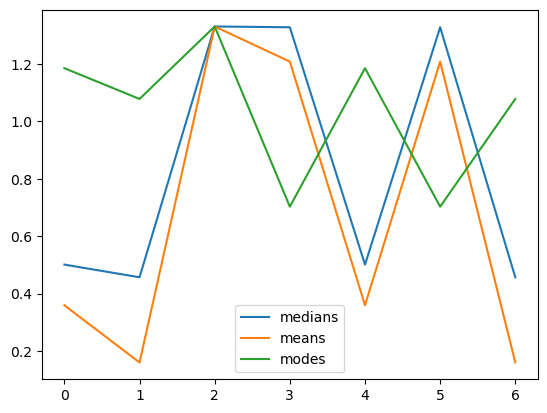

In [55]:
plt.plot(medians, label="medians")
plt.plot(means, label="means")
plt.plot(modes, label="modes")
plt.legend()

In [32]:
pc_diffs_1.shape

()

In [12]:
pc.shape

(1998, 3)

In [180]:
particle_2 = np.array([cd['positions_x_ground_truth'][110], cd['positions_y_ground_truth'][110]])
pc_diffs_2 = pcs - particle_2
pcs_in_range_2 = pcs[np.linalg.norm(pc_diffs_2, axis=1) < 10]

In [181]:
particle_3 = np.array([cd['positions_x_ground_truth'][250], cd['positions_y_ground_truth'][250]])
pc_diffs_3 = pcs - particle_3
pcs_in_range_3 = pcs[np.linalg.norm(pc_diffs_3, axis=1) < 10]

In [186]:
directed_hausdorff(pcs_in_range_2, pcs_in_range_1)

(1.6164060820896708, 20, 17)

In [188]:
directed_hausdorff(pcs_in_range_3, pcs_in_range_1)

(38.32954640428127, 12, 17)

In [210]:
directed_hausdorff(pcs_in_range_2, None)

IndexError: tuple index out of range

In [200]:
import math
test = np.array([math.inf, 1, 2, 3, 4])

In [197]:
np.place(test, test == math.inf, 10)

In [204]:
np.delete(test, test == math.inf)

array([1., 2., 3., 4.])

In [124]:
points = np.array([particle_1, particle_2, particle_3])
diffs = []
pcs_in_range = []
for p in points: 
    diff  = p-pcs
    pcs_in_range.append(pcs[np.linalg.norm(diff, axis=1)< 10])

In [125]:
pcs_in_range

[array([[ 2.06389837e+01,  1.34601885e+01],
        [ 2.15696355e+01,  1.47823699e+01],
        [ 2.21898228e+01,  1.52770514e+01],
        [ 2.29171887e+01,  1.54695552e+01],
        [ 3.18196474e+01, -1.64294857e+00],
        [ 3.15141143e+01, -1.60540130e+00],
        [ 2.29525122e+01,  1.57010911e+01],
        [ 2.31892984e+01,  1.60392416e+01],
        [ 2.34369429e+01,  1.58455436e+01],
        [ 3.40575418e+01, -3.88187536e-01],
        [ 3.45245475e+01,  2.36690968e-02],
        [ 3.52318912e+01,  5.32678041e-01],
        [ 2.68879676e+01, -2.00805263e+00],
        [ 2.80760660e+01, -1.45589733e+00],
        [ 2.81325248e+01, -1.74963057e+00],
        [ 2.82732718e+01, -1.45746953e+00],
        [ 2.87806951e+01, -1.12043621e+00],
        [ 2.89378402e+01, -1.01803828e+00],
        [ 2.91900815e+01, -1.37340294e+00],
        [ 3.02476793e+01, -4.85549619e-01],
        [ 3.02990408e+01, -5.02525290e-01],
        [ 3.11888636e+01, -8.47524656e-01],
        [ 3.12569828e+01, -5.737

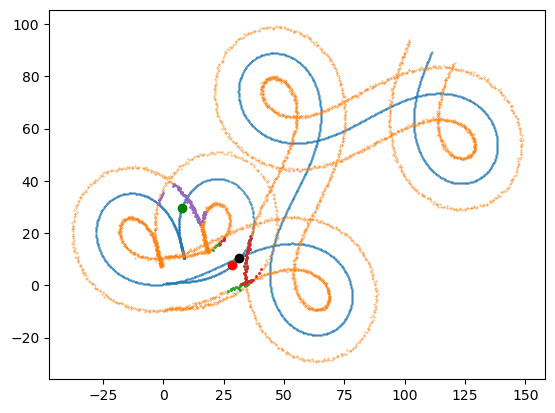

In [90]:
plt.scatter(cd['positions_x_ground_truth'], cd['positions_y_ground_truth'], s=0.15)
plt.scatter(pc['pc_x'], pc['pc_y'], s=0.1)
plt.scatter(point_1[0], point_1[1], c="red")
plt.scatter(pcs_in_range_1[:,0], pcs_in_range_1[:,1], s=1)

plt.scatter(point_2[0], point_2[1], c="black")
plt.scatter(pcs_in_range_2[:,0], pcs_in_range_2[:,1], s=1)

plt.scatter(point_3[0], point_3[1], c="green")
plt.scatter(pcs_in_range_3[:,0], pcs_in_range_3[:,1], s=1)


# Point Cloud Similarity

In [101]:
def get_point_cloud_similarity(pc_1, pc_2):
    smallest_dists = []
    for p in pc_1: 
        smallest = 100000
        for p2 in pc_2: 
            if (np.linalg.norm(p-p2) < smallest): 
                smallest = np.linalg.norm(p-p2)
        smallest_dists.append(smallest)
    return np.array(smallest_dists).mean()

In [102]:
pc_1_2 = get_point_cloud_similarity(pcs_in_range_1, pcs_in_range_2)
pc_2_3 = get_point_cloud_similarity(pcs_in_range_2, pcs_in_range_3)
pc_1_3 = get_point_cloud_similarity(pcs_in_range_1, pcs_in_range_3)

print(pc_1_2, pc_2_3, pc_1_3)

0.8224023923944244 24.277551511559125 25.46235391431421


In [98]:
len(pcs_in_range_1)

74

## LIDAR data generation

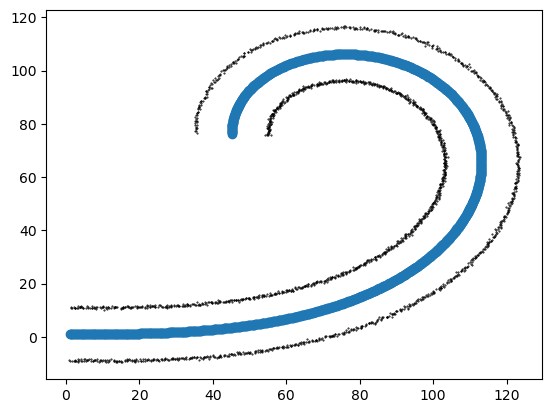

In [171]:
plt.scatter(pc['pc_x'], pc['pc_y'], s=0.2, c="black")
plt.scatter(cd['positions_x_ground_truth'], cd['positions_y_ground_truth'])

## Map Point Cloud Data

In [8]:
pc = pd.read_csv("../data/map/map_pc.csv")
pc['point_y'] = -pc['point_y']
pc.head()

FileNotFoundError: [Errno 2] No such file or directory: '../data/map/map_pc.csv'

In [68]:
pc.shape

(799539, 11)

In [69]:
def get_rotation_matrix(theta): 
    return np.array([[np.cos(theta), -np.sin(theta)], [np.sin(theta), np.cos(theta)]])

def linear_coord_transformation(local_pos: np.ndarray, rot_matrix: np.ndarray, global_pos):
    global_pos = np.dot(local_pos, rot_matrix) + global_pos
    return global_pos

In [70]:
pc_trans = []
for i,p in pc.iterrows():
     rot_mat = get_rotation_matrix(p['rot_yaw'])
     pc_trans.append(linear_coord_transformation(np.array([p['point_x'], p['point_y']]), rot_mat, np.array([p['loc_x'], p['loc_y']])))
pc_trans = np.array(pc_trans)

In [71]:
%matplotlib qt
plt.scatter(pc_trans[:,0], pc_trans[:,1], s=0.001)

In [7]:
angle = np.deg2rad(45)
add = np.deg2rad(90)
vector1 = np.array([np.cos(angle), np.sin(angle)])
vector2 = np.array([np.cos(angle+add), np.sin(angle+add)])
print(np.dot(vector1, vector2))

1.1102230246251565e-16


In [ ]:
plt.quiver()

## Evaluation Results

In [8]:
result_data = pd.read_csv("../data/evaluation_results/results.csv")

<BarContainer object of 4 artists>

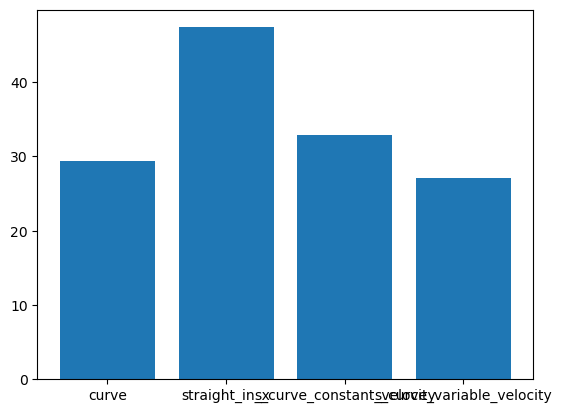

In [9]:
plt.bar(result_data['road'], result_data['mse_db'])

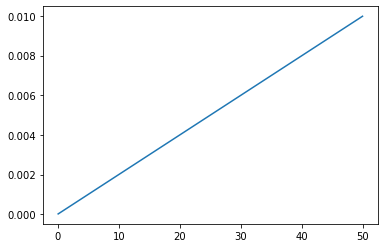

In [11]:
plt.plot(curve_data['timestamps'], curve_data['acceleration_input'])